## **Group Project**


##### **Title** : Yummy Or Dummy?
Angela Li, Phoebe Wu, Sarah Feng

##### **Introduction**
Mushrooms are commonly found in nature and can be very beneficial to ecosystems as fungi play a role in the decomposition of waste and recycling of nutrients. Most mushrooms have a very similar appearance but have contrasting toxicity levels. Thus, distinguishing between poisonous and edible mushrooms can be confusing. Several previous studies in different areas such as microbiology and computer visualization have attempted to identify and classify mushrooms due to this fact. 

Mushrooms have been a part of our diet for centuries due to their nutritional benefits, medicinal utilities, and unique taste; however, not all mushrooms are safe for consumption (Kissanga, 2022). Anyone familiar with the outdoors knows to avoid exploration in eating mushrooms they are unfamiliar with, as many mushroom species produce toxic substances resulting in the consumption of some to be even fatal due to ingesting toxins such as “ amatoxin, psilocybin, muscarine, coprine, allenic norleucine, gyromitrin, etc.” (Tran & Juergens, 2022, page1).

Misidentifying a mushroom as being edible and, as a result, consuming poisonous mushrooms could lead to “liver failure, kidney failure and neurological damage” (Jo, 2014). It is crucial to be educated on what indicators could predict whether a mushroom is poisonous or not.  Of the 0.14 million species of mushrooms estimated to exist, approximately 14 000 are known to scientists and only around 7 000 are believed to be edible (Jo, 2014).

Every year, in areas with high mushroom consumption, there is a notable number of mushroom poisoning cases reported, with the misidentification of edible mushroom species being one of the leading causes (Jo, 2014). This shows a need for models such as this one that may alleviate this devastating outcome.

No single trait can differentiate all edible mushrooms from poisonous ones. In fact, scientists have even classified the toxins used by non-edible mushrooms into seven different categories (Jo, 2014).  From a dataset of known edible and poisonous mushrooms, we wish to train a model that can help predict whether a mushroom is edible or poisonous from data provided in the dataset, which includes a combination of its physical features, population characteristics, and habitat. 





##### **Methods and Results**

Since we are trying to create a model to determine if the model is edible or poisonous, we have a classification problem. We will compare/cross-validate using k-nearest neighbours classification algorithm. Then, we will do hyperparameter optimization on it to choose the best hyperparameters for our model using GridSearch. Next, we will fit our training data on the best model from our optimization and score our model using the test dataset.


First, the dataset was tidied, and we renamed many of the shortened column names into legible ones more indicative of the observations they contained. We then split the dataset into our training and testing groups, with 20% of our data being split into the testing group. 


We then conducted some preliminary data analysis to see which features we should include in our model and the spread of our dataset. 


In [1]:
# Import required packages
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

Many physical attributes of mushrooms are described with words specific to mycology-related jargon, which we have adopted into our project. Thus, we must first explain the general meaning of these words. 

A mushroom *cap* is the top of the mushroom, often eaten should the mushroom be edible. Assuming most readers are familiar with the general shape of a mushroom, the *stalk* refers to the often sturdy construct below it, acting like a tree-stump, to prop the cap up.  On the underside of the cap, ringed around the connecting point to the stalk are ruffled *gills*, which are often also eaten when possible. When a mushroom is growing, the cap is completely enveloped inside a protective veil, which is attached like a balloon around the stalk. However, as the cap breaks free, the remnants of this veil can remain on the stalk, where it becomes a *ring*, or *skirt*. Finally, *spores* are the reproductive method of choice for the fungi, and are tiny particles released from between the gills of mature mushrooms (Kissanga, 2022).

This reflects the jargon used in naming the columns below.

In [2]:
# Read mushroom dataset from kaggle via URL
mushrooms_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')

# rename columns for readability and ease of use
col_names = {
    "p": "class",
    "x": "cap_shape",
    "s": "cap_surface",
    "n": "cap_colour",
    "t": "bruises",
    "p.1": "odour",
    "f": "gill_attachment",
    "c": "gill_spacing",
    "n.1": "gill_size",
    "k": "gill_colour",
    "e": "stalk_shape",
    "e.1": "stalk_root",
    "s.1": "stalk_surface_above_ring",
    "s.2": "stalk_surface_below_ring",
    "w": "stalk_colour_above_ring",
    "w.1": "stalk_colour_below_ring",
    "p.2": "veil_type",
    "w.2": "veil_colour",
    "o": "ring_number",
    "p.3": "ring_type",
    "k.1": "spore_print_colour",
    "s.3": "population",
    "u": "habitat",
}
mushrooms_df = mushrooms_df.rename(columns=col_names)
mushrooms_df

,class,cap_shape,cap_surface,cap_colour,bruises,odour,gill_attachment,gill_spacing,gill_size,gill_colour,...,stalk_surface_below_ring,stalk_colour_above_ring,stalk_colour_below_ring,veil_type,veil_colour,ring_number,ring_type,spore_print_colour,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
mushrooms_df['class'] = mushrooms_df['class'].replace({
           'e' : 0,
           'p' : 1
        }).astype('int')
mushrooms_df

,class,cap_shape,cap_surface,cap_colour,bruises,odour,gill_attachment,gill_spacing,gill_size,gill_colour,...,stalk_surface_below_ring,stalk_colour_above_ring,stalk_colour_below_ring,veil_type,veil_colour,ring_number,ring_type,spore_print_colour,population,habitat
0,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,0,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,0,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,0,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,1,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
train_df, test_df = train_test_split(mushrooms_df, test_size=0.25, random_state=123)
train_df.head()

,class,cap_shape,cap_surface,cap_colour,bruises,odour,gill_attachment,gill_spacing,gill_size,gill_colour,...,stalk_surface_below_ring,stalk_colour_above_ring,stalk_colour_below_ring,veil_type,veil_colour,ring_number,ring_type,spore_print_colour,population,habitat
6576,1,f,s,n,f,y,f,c,n,b,...,k,p,p,p,w,o,e,w,v,l
6281,1,x,y,e,f,f,f,c,n,b,...,k,w,p,p,w,o,e,w,v,d
6273,1,f,s,n,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,l
4938,0,k,s,b,t,n,f,c,b,w,...,s,e,w,p,w,t,e,w,c,w
6874,1,f,s,n,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,l


In [5]:
train_df.describe()

,class
count,6092.000000
mean,0.482928
std,0.499749
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
from pandas_profiling import ProfileReport

profile = ProfileReport(train_df, title = "Pandas Profiling Report")
profile.to_notebook_iframe()

ModuleNotFoundError: No module named 'pandas_profiling'

In [7]:
X_train = train_df.drop(columns=["class"])
y_train = train_df["class"]

X_test = test_df.drop(columns=["class"])
y_test = test_df["class"]

In [8]:
alt.data_transformers.disable_max_rows()
alt.Chart(X_train).mark_bar().encode(
        x=alt.X(alt.repeat('repeat')),
        y="count()",
    ).properties(
        width=200,
        height=200
    ).repeat(
        repeat= list(X_train.columns), 
        columns=5
    )

/opt/conda/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.RepeatChart(...)

**Figure 1.0**

Plot matrix of the variables availible in the dataset other than the variable we plan to predict: class.

As can be seen above, there is only one possible observation for veil types, making it not a useful prediction variable. Hence, we will not use it in our model. This also marks the end of preliminary data analysis, and we begin taking steps to build our model.

In [9]:
results = {}
scoring = ["accuracy", "recall"]

In [10]:
dummy = DummyClassifier(strategy="stratified")
scores = cross_validate(dummy, X_train, y_train, return_train_score=True, scoring=scoring)
results["dummy"] = pd.DataFrame(scores).mean()

In [11]:
pd.DataFrame(results).T

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall
dummy,0.005719,0.009366,0.498199,0.502667,0.472482,0.486911


In [12]:
categorical_feats = ["cap_shape", "cap_surface", "cap_colour", "odour", "gill_colour", "stalk_root", "stalk_surface_above_ring", "stalk_surface_below_ring", "stalk_colour_above_ring", "stalk_colour_below_ring", "veil_colour", "ring_type", "spore_print_colour", "population", "habitat"]
ordinal_feats = ["ring_number"]
binary_feats = ["bruises", "gill_attachment", "gill_spacing", "gill_size", "stalk_shape"]
drop_feats = ["veil_type"]

In [13]:
ct = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_feats),
    (OrdinalEncoder(categories=[["n", "o", "t"]]), ordinal_feats),
    (OneHotEncoder(drop="if_binary", dtype=int), binary_feats),
    ("drop", drop_feats),
)
ct

ColumnTransformer(transformers=[('onehotencoder-1',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['cap_shape', 'cap_surface', 'cap_colour',
                                  'odour', 'gill_colour', 'stalk_root',
                                  'stalk_surface_above_ring',
                                  'stalk_surface_below_ring',
                                  'stalk_colour_above_ring',
                                  'stalk_colour_below_ring', 'veil_colour',
                                  'ring_type', 'spore_print_colour',
                                  'population', 'habitat']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['n', 'o', 't']]),
                                 ['ring_number']),
                                ('onehotencoder-2',
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>),
                                 ['bruises', 'gill_attachment', 'gill_spacing',
                                  'gill_size', 'stalk_shape']),
                                ('drop', 'drop', ['veil_type'])])

In [14]:
ct.fit(X_train)
ct.named_transformers_

{'onehotencoder-1': OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 'ordinalencoder': OrdinalEncoder(categories=[['n', 'o', 't']]),
 'onehotencoder-2': OneHotEncoder(drop='if_binary', dtype=<class 'int'>),
 'drop': 'drop'}

In [16]:
column_names = (
    ordinal_feats + binary_feats + ct.named_transformers_["onehotencoder-1"].get_feature_names_out().tolist()
)

In [17]:
X_train_enc = pd.DataFrame(
    ct.transform(X_train), index = X_train.index, columns=column_names
)
X_train_enc

,ring_number,bruises,gill_attachment,gill_spacing,gill_size,stalk_shape,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_k,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
6576,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
6281,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
6273,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
4938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0
6874,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
1346,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3454,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
7533,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0


In [18]:
knn = KNeighborsClassifier()
scores = cross_validate(knn, X_train_enc, y_train, return_train_score=True, scoring=scoring)
results["knn - all"] = pd.DataFrame(scores).mean()

In [19]:
pd.DataFrame(results).T

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall
dummy,0.005719,0.009366,0.498199,0.502667,0.472482,0.486911
knn - all,0.015880,0.699695,0.999672,0.999918,0.999320,0.999830


In [20]:
feature_names = categorical_feats + binary_feats + ordinal_feats

In [21]:
feat_results = {}
for feature in feature_names:
    X_col_enc = []
    for column in column_names:
        if column.startswith(feature):
            X_col_enc.append(column)
    print(X_col_enc)
    X_train_subset = X_train_enc[X_col_enc]
    X_train_subset
    scores = cross_validate(knn, X_train_subset, y_train, return_train_score=True, scoring=scoring)
    feat_results[feature] = pd.DataFrame(scores).mean()

['cap_shape_b', 'cap_shape_c', 'cap_shape_f', 'cap_shape_k', 'cap_shape_s', 'cap_shape_x']
['cap_surface_f', 'cap_surface_g', 'cap_surface_s', 'cap_surface_y']
['cap_colour_b', 'cap_colour_c', 'cap_colour_e', 'cap_colour_g', 'cap_colour_n', 'cap_colour_p', 'cap_colour_r', 'cap_colour_u', 'cap_colour_w', 'cap_colour_y']
['odour_a', 'odour_c', 'odour_f', 'odour_l', 'odour_m', 'odour_n', 'odour_p', 'odour_s', 'odour_y']
['gill_colour_b', 'gill_colour_e', 'gill_colour_g', 'gill_colour_h', 'gill_colour_k', 'gill_colour_n', 'gill_colour_o', 'gill_colour_p', 'gill_colour_r', 'gill_colour_u', 'gill_colour_w', 'gill_colour_y']
['stalk_root_?', 'stalk_root_b', 'stalk_root_c', 'stalk_root_e', 'stalk_root_r']
['stalk_surface_above_ring_f', 'stalk_surface_above_ring_k', 'stalk_surface_above_ring_s', 'stalk_surface_above_ring_y']
['stalk_surface_below_ring_f', 'stalk_surface_below_ring_k', 'stalk_surface_below_ring_s', 'stalk_surface_below_ring_y']
['stalk_colour_above_ring_b', 'stalk_colour_above_r

In [22]:
feat_results_df = pd.DataFrame(feat_results).T.sort_values(by = "test_accuracy", ascending=False)
feat_results_df

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall
cap_colour,0.013788,0.350886,0.989495,0.989494,0.978247,0.978246
habitat,0.009173,0.157643,0.940087,0.940085,0.894636,0.894630
ring_type,0.006241,0.125068,0.822730,0.824398,0.792067,0.797308
stalk_root,0.005823,0.133752,0.814510,0.813895,0.692041,0.691706
odour,0.011329,0.293770,0.813529,0.815783,0.713136,0.716433
veil_colour,0.007501,0.120415,0.752471,0.754963,0.701317,0.706299
stalk_surface_above_ring,0.005451,0.110589,0.737522,0.737524,0.605704,0.605710
gill_colour,0.012812,0.288238,0.735227,0.735227,0.643787,0.643780
spore_print_colour,0.008007,0.158109,0.716027,0.717251,0.465655,0.467034
stalk_colour_above_ring,0.007660,0.126397,0.646077,0.644784,0.763253,0.763897


In [23]:
feature_importances = list(feat_results_df.index)

In [24]:
X_col_enc = []
for column in column_names:
    if column.startswith('cap_colour'):
        X_col_enc.append(column)
print(X_col_enc)
X_train_subset = X_train_enc[X_col_enc]
X_train_subset


['cap_colour_b', 'cap_colour_c', 'cap_colour_e', 'cap_colour_g', 'cap_colour_n', 'cap_colour_p', 'cap_colour_r', 'cap_colour_u', 'cap_colour_w', 'cap_colour_y']


,cap_colour_b,cap_colour_c,cap_colour_e,cap_colour_g,cap_colour_n,cap_colour_p,cap_colour_r,cap_colour_u,cap_colour_w,cap_colour_y
6576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6281,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6874,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1346,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
cap_colour = pd.concat((y_train, X_train["cap_colour"]), axis=1)
cap_colour['class'] = cap_colour['class'].replace({
           0 : 'edible',
           1 : 'poisonous'
        }).astype('str')
cap_colour = cap_colour.groupby(["class", 'cap_colour']).size().reset_index().rename(columns={0:"n"})
cap_colour

,class,cap_colour,n
0,edible,b,34
1,edible,c,21
2,edible,e,482
3,edible,g,776
4,edible,n,938
5,edible,p,36
6,edible,r,15
7,edible,u,9
8,edible,w,537
9,edible,y,302


To visualize how each feature affected the accuracy, we plotted the occurrences of the observation types with our predicted observations of edible or poisonous. First, we test cap colour, to check if it will be a good predictor.

In both cap colour and habitat, as will be seen below, we see variables which exist only for one sub-type, making them bad predictors. Hence, we will remove both variables from our model.


In [26]:
cap_colour_plot = (
    alt.Chart(cap_colour)
    .mark_bar()
    .encode(
        x=alt.X("class", title=None, axis=None),
        y=alt.Y("n", title= "Number of Mushrooms"),
        color=alt.Color("class", title= 'Class'),
        column=alt.Column("cap_colour", title=None)
    ).configure_axis(labelFontSize=20, titleFontSize=20)
                    .configure_legend(labelFontSize=20, titleFontSize=20)
                .properties(width = 150, height = 150)
)
cap_colour_plot

/opt/conda/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

**Figure 2.0**

Number of observations of the variable 'cap_colour' for each category of the predicted variable: class. Notice the severe imbalance in the sub-types *r* and *u*.

In [27]:
habitat = pd.concat((y_train, X_train["habitat"]), axis=1)
habitat['class'] = habitat['class'].replace({
           0 : 'edible',
           1 : 'poisonous'
        }).astype('str')
habitat = habitat.groupby(["class", 'habitat']).size().reset_index().rename(columns={0:"n"})
habitat

,class,habitat,n
0,edible,d,1403
1,edible,g,1059
2,edible,l,175
3,edible,m,196
4,edible,p,103
5,edible,u,70
6,edible,w,144
7,poisonous,d,950
8,poisonous,g,559
9,poisonous,l,433


In [28]:
habitat_plot = (
    alt.Chart(habitat)
    .mark_bar()
    .encode(
        x=alt.X("class", title=None, axis=None),
        y=alt.Y("n", title= "Number of Mushrooms"),
        color=alt.Color("class", title= 'Class'),
        column=alt.Column("habitat", title=None)
    ).configure_axis(labelFontSize=20, titleFontSize=20)
                    .configure_legend(labelFontSize=20, titleFontSize=20)
                .properties(width = 150, height = 150)
)
habitat_plot

/opt/conda/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

**Figure 2.1**

Number of observations of the variable 'cap_colour' for each category of the predicted variable: class. Notice the severe imbalance in the sub-type *w*, and milder imbalance in the subtypes *m* and *p*.

In [29]:
categorical_feats = ["cap_shape", "cap_surface", "odour", "gill_colour", "stalk_root", "stalk_surface_above_ring", "stalk_surface_below_ring", "stalk_colour_above_ring", "stalk_colour_below_ring", "veil_colour", "ring_type", "spore_print_colour", "population"]
ordinal_feats = ["ring_number"]
binary_feats = ["bruises", "gill_attachment", "gill_spacing", "gill_size", "stalk_shape"]
drop_feats = ["veil_type", "cap_colour", "habitat"]

In [30]:
ct = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_feats),
    (OrdinalEncoder(categories=[["n", "o", "t"]]), ordinal_feats),
    (OneHotEncoder(drop="if_binary", dtype=int), binary_feats),
    ("drop", drop_feats),
)
ct

ColumnTransformer(transformers=[('onehotencoder-1',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['cap_shape', 'cap_surface', 'odour',
                                  'gill_colour', 'stalk_root',
                                  'stalk_surface_above_ring',
                                  'stalk_surface_below_ring',
                                  'stalk_colour_above_ring',
                                  'stalk_colour_below_ring', 'veil_colour',
                                  'ring_type', 'spore_print_colour',
                                  'population']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['n', 'o', 't']]),
                                 ['ring_number']),
                                ('onehotencoder-2',
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>),
                                 ['bruises', 'gill_attachment', 'gill_spacing',
                                  'gill_size', 'stalk_shape']),
                                ('drop', 'drop',
                                 ['veil_type', 'cap_colour', 'habitat'])])

In [31]:
pipe = make_pipeline(ct, knn)

In [32]:
scores = cross_validate(pipe, X_train, y_train, return_train_score=True, scoring=scoring)
results["drop top 2"] = pd.DataFrame(scores).mean()

In [33]:
X_imp = feature_importances[2:22]
X_imp

['ring_type',
 'stalk_root',
 'odour',
 'veil_colour',
 'stalk_surface_above_ring',
 'gill_colour',
 'spore_print_colour',
 'stalk_colour_above_ring',
 'population',
 'stalk_colour_below_ring',
 'stalk_surface_below_ring',
 'cap_shape',
 'ring_number',
 'gill_attachment',
 'stalk_shape',
 'gill_spacing',
 'cap_surface',
 'gill_size',
 'bruises']

In [34]:
X_col_enc = []
for column in column_names:
    if column.startswith(tuple(X_imp)):
        X_col_enc.append(column)
print(X_col_enc)
X_train_subset = X_train_enc[X_col_enc]
X_train_subset


['ring_number', 'bruises', 'gill_attachment', 'gill_spacing', 'gill_size', 'stalk_shape', 'cap_shape_b', 'cap_shape_c', 'cap_shape_f', 'cap_shape_k', 'cap_shape_s', 'cap_shape_x', 'cap_surface_f', 'cap_surface_g', 'cap_surface_s', 'cap_surface_y', 'odour_a', 'odour_c', 'odour_f', 'odour_l', 'odour_m', 'odour_n', 'odour_p', 'odour_s', 'odour_y', 'gill_colour_b', 'gill_colour_e', 'gill_colour_g', 'gill_colour_h', 'gill_colour_k', 'gill_colour_n', 'gill_colour_o', 'gill_colour_p', 'gill_colour_r', 'gill_colour_u', 'gill_colour_w', 'gill_colour_y', 'stalk_root_?', 'stalk_root_b', 'stalk_root_c', 'stalk_root_e', 'stalk_root_r', 'stalk_surface_above_ring_f', 'stalk_surface_above_ring_k', 'stalk_surface_above_ring_s', 'stalk_surface_above_ring_y', 'stalk_surface_below_ring_f', 'stalk_surface_below_ring_k', 'stalk_surface_below_ring_s', 'stalk_surface_below_ring_y', 'stalk_colour_above_ring_b', 'stalk_colour_above_ring_c', 'stalk_colour_above_ring_e', 'stalk_colour_above_ring_g', 'stalk_colour

,ring_number,bruises,gill_attachment,gill_spacing,gill_size,stalk_shape,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_k,...,spore_print_colour_r,spore_print_colour_u,spore_print_colour_w,spore_print_colour_y,population_a,population_c,population_n,population_s,population_v,population_y
6576,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6281,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6273,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6874,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1346,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3454,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7533,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [35]:
scores = cross_validate(knn, X_train_subset, y_train, return_train_score=True, scoring=scoring)
results["all but top 2"] = pd.DataFrame(scores).mean()

In [36]:
pd.DataFrame(results).T

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall
dummy,0.005719,0.009366,0.498199,0.502667,0.472482,0.486911
knn - all,0.015880,0.699695,0.999672,0.999918,0.999320,0.999830
drop top 2,0.080427,0.327849,0.999672,0.999918,0.999320,0.999830
all but top 2,0.008343,0.341147,0.996060,0.997784,0.994899,0.997196


In [37]:
for i in range(3,23):
    X_imp = feature_importances[2:i]
    X_col_enc = []
    for column in column_names:
        if column.startswith(tuple(X_imp)):
            X_col_enc.append(column)
    print(X_col_enc)
    X_train_subset = X_train_enc[X_col_enc]
    scores = cross_validate(knn, X_train_subset, y_train, return_train_score=True, scoring=scoring)
    delimiter = ', '
    accuracy_results[delimiter.join(X_imp)] = pd.DataFrame(scores).mean()

['ring_type_e', 'ring_type_f', 'ring_type_l', 'ring_type_n', 'ring_type_p']


NameError: name 'accuracy_results' is not defined

In [38]:
pd.DataFrame(accuracy_results).T

NameError: name 'accuracy_results' is not defined

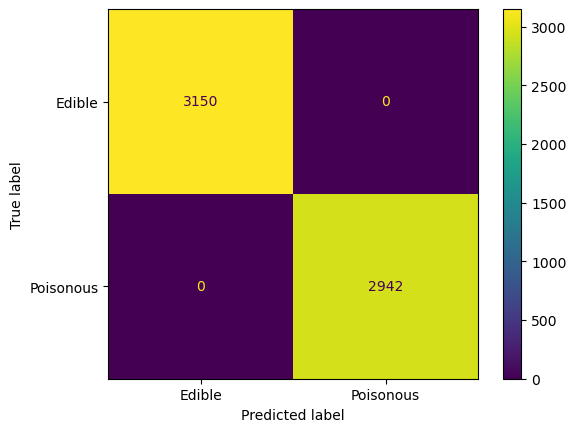

In [39]:
pipe.fit(X_train, y_train)
confusion = ConfusionMatrixDisplay.from_estimator(
    pipe, X_train, y_train, display_labels = ["Edible", "Poisonous"]
)

**Figure 2.3**

Confusion matrix of the model on the training data. 

This high value is to be expected and is even concerning: since this is the data it was trained with, it likely will not behave this well against the testing data, and this is likely due to overfitting. However, after all the different things we have tried, we believe this strange behavior is due to the dataset itself, and we predict that the model will still predict accuractly even against the testing data.

In [40]:
param_grid = {
    "kneighborsclassifier__n_neighbors": range(2, 20, 1),
}
grid_search = GridSearchCV(
    pipe, param_grid, cv = 5, scoring=scoring, refit="recall"
)
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder-1',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['cap_shape',
                                                                          'cap_surface',
                                                                          'odour',
                                                                          'gill_colour',
                                                                          'stalk_root',
                                                                          'stalk_surface_above_ring',
                                                                          'stalk_surface_below_ring',
                                                                          'stalk_colour_above_ring',
                                                                          'stalk_colour_below_ring',
                                                                          'veil_c...
                                                                        ('onehotencoder-2',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       dtype=<class 'int'>),
                                                                         ['bruises',
                                                                          'gill_attachment',
                                                                          'gill_spacing',
                                                                          'gill_size',
                                                                          'stalk_shape']),
                                                                        ('drop',
                                                                         'drop',
                                                                         ['veil_type',
                                                                          'cap_colour',
                                                                          'habitat'])])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(2, 20)},
             refit='recall', scoring=['accuracy', 'recall'])

In [41]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder-1',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['cap_shape',
                                                                          'cap_surface',
                                                                          'odour',
                                                                          'gill_colour',
                                                                          'stalk_root',
                                                                          'stalk_surface_above_ring',
                                                                          'stalk_surface_below_ring',
                                                                          'stalk_colour_above_ring',
                                                                          'stalk_colour_below_ring',
                                                                          'veil_c...
                                                                        ('onehotencoder-2',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       dtype=<class 'int'>),
                                                                         ['bruises',
                                                                          'gill_attachment',
                                                                          'gill_spacing',
                                                                          'gill_size',
                                                                          'stalk_shape']),
                                                                        ('drop',
                                                                         'drop',
                                                                         ['veil_type',
                                                                          'cap_colour',
                                                                          'habitat'])])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(2, 20)},
             refit='recall', scoring=['accuracy', 'recall'])

In [42]:
grid_results = pd.DataFrame(grid_search.cv_results_)
grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,...,std_test_accuracy,rank_test_accuracy,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,0.108754,0.032740,0.453207,0.165044,2,{'kneighborsclassifier__n_neighbors': 2},1.00000,1.0,1.000000,1.0,...,0.000000,1,1.000000,1.0,1.000000,1.0,1.000000,1.00000,0.000000,1
1,0.073724,0.038816,0.253304,0.131543,3,{'kneighborsclassifier__n_neighbors': 3},1.00000,1.0,1.000000,1.0,...,0.000000,1,1.000000,1.0,1.000000,1.0,1.000000,1.00000,0.000000,1
2,0.070385,0.026631,0.288924,0.101254,4,{'kneighborsclassifier__n_neighbors': 4},1.00000,1.0,1.000000,1.0,...,0.000657,3,1.000000,1.0,1.000000,1.0,0.996599,0.99932,0.001361,3
3,0.108886,0.082911,0.397983,0.221572,5,{'kneighborsclassifier__n_neighbors': 5},1.00000,1.0,1.000000,1.0,...,0.000657,3,1.000000,1.0,1.000000,1.0,0.996599,0.99932,0.001361,3
4,0.066293,0.027368,0.285742,0.204799,6,{'kneighborsclassifier__n_neighbors': 6},0.99918,1.0,0.999179,1.0,...,0.000614,5,0.998302,1.0,0.998299,1.0,0.996599,0.99864,0.001273,5
5,0.046627,0.002650,0.180133,0.006636,7,{'kneighborsclassifier__n_neighbors': 7},0.99918,1.0,0.999179,1.0,...,0.000614,5,0.998302,1.0,0.998299,1.0,0.996599,0.99864,0.001273,5
6,0.053742,0.008536,0.287717,0.137284,8,{'kneighborsclassifier__n_neighbors': 8},0.99918,1.0,0.999179,1.0,...,0.000614,5,0.998302,1.0,0.998299,1.0,0.996599,0.99864,0.001273,5
7,0.043942,0.001917,0.176457,0.004496,9,{'kneighborsclassifier__n_neighbors': 9},0.99918,1.0,0.999179,1.0,...,0.000614,5,0.998302,1.0,0.998299,1.0,0.996599,0.99864,0.001273,5
8,0.044558,0.004020,0.174909,0.005928,10,{'kneighborsclassifier__n_neighbors': 10},0.99918,1.0,0.999179,1.0,...,0.000614,5,0.998302,1.0,0.998299,1.0,0.996599,0.99864,0.001273,5
9,0.057817,0.017166,0.241373,0.051260,11,{'kneighborsclassifier__n_neighbors': 11},0.99918,1.0,0.999179,1.0,...,0.000614,5,0.998302,1.0,0.998299,1.0,0.996599,0.99864,0.001273,5


In [43]:
accuracy_versus_k_grid = (
    alt.Chart(grid_results, title="Grid Search")
    .mark_line(point=True)
    .encode(
        x=alt.X(
            'param_kneighborsclassifier__n_neighbors',
            title="Neighbors",
            scale=alt.Scale(zero=False),
        ),
        y=alt.Y(
            'mean_test_accuracy', 
            title="Mean Test Accuracy", 
            scale=alt.Scale(zero=False)
        ),
    )
    .configure_axis(labelFontSize=10, titleFontSize=15)
    .properties(width=400, height=300)
)
recall_versus_k_grid = (
    alt.Chart(grid_results, title="Grid Search")
    .mark_line(point=True)
    .encode(
        x=alt.X(
            'param_kneighborsclassifier__n_neighbors',
            title="Neighbors",
            scale=alt.Scale(zero=False),
        ),
        y=alt.Y(
            'mean_test_recall', 
            title="Mean Test Recall", 
            scale=alt.Scale(zero=False)
        ),
    )
    .configure_axis(labelFontSize=10, titleFontSize=15)
    .properties(width=400, height=300)
)

In [44]:
accuracy_versus_k_grid

/opt/conda/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [45]:
recall_versus_k_grid

alt.Chart(...)

In [46]:
best_knn = grid_search.best_estimator_
best_knn

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['cap_shape', 'cap_surface',
                                                   'odour', 'gill_colour',
                                                   'stalk_root',
                                                   'stalk_surface_above_ring',
                                                   'stalk_surface_below_ring',
                                                   'stalk_colour_above_ring',
                                                   'stalk_colour_below_ring',
                                                   'veil_colour', 'ring_type',
                                                   'spore_pr...
                                                   'population']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['n',
                                                                              'o',
                                                                              't']]),
                                                  ['ring_number']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype=<class 'int'>),
                                                  ['bruises', 'gill_attachment',
                                                   'gill_spacing', 'gill_size',
                                                   'stalk_shape']),
                                                 ('drop', 'drop',
                                                  ['veil_type', 'cap_colour',
                                                   'habitat'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])

SCORE OUR MODEL!!

In [47]:
best_knn.score(X_test, y_test)

1.0

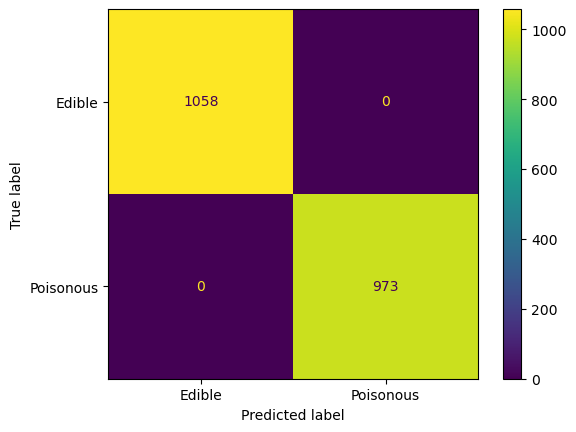

In [48]:
test_confusion = ConfusionMatrixDisplay.from_estimator(
    best_knn, X_test, y_test, display_labels = ["Edible", "Poisonous"]
)